# **Drugs A, B, C, X, Y for Decision Trees**

The code below is taken from Pablo M Gomez's submission on [kaggle.com](https://www.kaggle.com/pablomgomez21/decision-trees-practice).

You are encouraged to go to the link above and check the full code. In this lab, you will do the necessary steps to explore the data and prepare it for sklearn algorithms.

**About the data set**

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

**Import libraries**

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import required sklearn libraries for Decision Tree Classifier
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Acquire data

In [5]:
# Read in the data using panda's read_csv method
my_data = pd.read_csv("SupervisedLearning/DrugSelection/drug200.csv")

#TODO: Write code to inspect the first five rows of the dataframe
my_data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# Inspect data

In [6]:
#TODO: Write code to inspect the shape of the data frame
my_data.shape

(200, 6)

In [7]:
#TODO: Write code to display information about the data frame
my_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
#TODO: Write code to display statistics about the data frame
my_data.values

array([[23, 'F', 'HIGH', 'HIGH', 25.355, 'drugY'],
       [47, 'M', 'LOW', 'HIGH', 13.093, 'drugC'],
       [47, 'M', 'LOW', 'HIGH', 10.114, 'drugC'],
       ...,
       [52, 'M', 'NORMAL', 'HIGH', 9.894, 'drugX'],
       [23, 'M', 'NORMAL', 'NORMAL', 14.02, 'drugX'],
       [40, 'F', 'LOW', 'NORMAL', 11.349, 'drugX']], dtype=object)

# Clean data

**Correcting**

In [9]:
#TODO: Write code to drop rows having missing values
#Asked in Discussion

**Converting**

Declare two variables:

* X: feature matrix with the data 
* y: response vector with target information[link text](https://)


In [21]:
#TODO: Write code to declare X
# Hint: remove the column containing the target of this prediction problem (which is drugtype)
# Note: To run the next section, X is expected to be an array. 
# You can get an array from a data frame with: X = X.values
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

#TODO: Write code to inspect the first five rows of X
# Note: If X is an array, instead of using the head() function,
# you will need to use array functionality to output the first five values.
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using **pandas.get_dummies()** to convert the categorical variable into dummy/indicator variables.

**Note:** If you run this block once, in order to run it again, you will need to redeclare X in the previous block or it will throw errors trying to convert data it has already converted.

In [22]:
# Define a label encoder for the sex feature to be 0 or 1
# X is expected to be an array here. If it's a dataframe, get the array version by running:
# X = X.values

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

#TODO: Write code to encode the BP feature in X[:,2]
# from 'Low', 'NORMAL', 'HIGH', to 0, 1, 2
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

# Define a label encoder for the Chol feature to be 0 or 1
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [23]:
#TODO: Write code to declare y
# Hint: this is the column containing the target of this prediction problem
y = my_data["Drug"]

#TODO: Write code to inspect the first five rows of y
y[0:5] 

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

# Earn Your Wings

Use a decision tree classifier on the cleaned data set to predict y for the given data. Report the accuracy score. Add comments in your code to explain each step that you take in your implementation.

In [17]:
#Importing train_test_split from sklearn.cross_validation
from sklearn.model_selection import train_test_split

In [24]:
#test_train_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [25]:
#checking if the xy trainset & xy testset dimensions match
print("X_trainsetX SHAPE:   " + str(X_trainset.shape))
print("y_trainsetY SHAPE:   " + str(y_trainset.shape))
print("X_testset: " + str(X_testset.shape))
print("y_testset: " + str(y_testset.shape))
#Same thing as above 
print('Shape of X training set{}'.format(X_trainset.shape))
print('Shape of Y training set{}'.format(y_trainset.shape))

X_trainsetX SHAPE:   (140, 5)
y_trainsetY SHAPE:   (140,)
X_testset: (60, 5)
y_testset: (60,)
Shape of X training set(140, 5)
Shape of Y training set(140,)


In [26]:
#creating an instance of the DecisionTreeClassifier called "drugTree"
drugTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [27]:
#Fit the data with training matrix X_trainset and training response y_trainset
drugTree.fit(X_trainset,y_trainset)  

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [28]:
#Making predictions
predTree = drugTree.predict(X_testset)

In [29]:
#Comparing predictions to actual values 
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [33]:
#importing metrics from sklearn and checking accuracy
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTree's Accuracy:  0.9833333333333333


In [41]:
#Visualization 
from sklearn import tree
featureNames = my_data.columns[0:5]
out= tree.export_graphviz(drugTree, out_file = 'SupervisedLearning/DrugSelection/DrugSelection.dot',
                    feature_names=featureNames,
                     class_names= sorted(y.unique()),
                     label = 'all',
                     rounded = True,
                     filled = True) 

In [64]:
ls

Description.ipynb  ReinforcementLearning/  UnsupervisedLearning/
Observations/      SupervisedLearning/


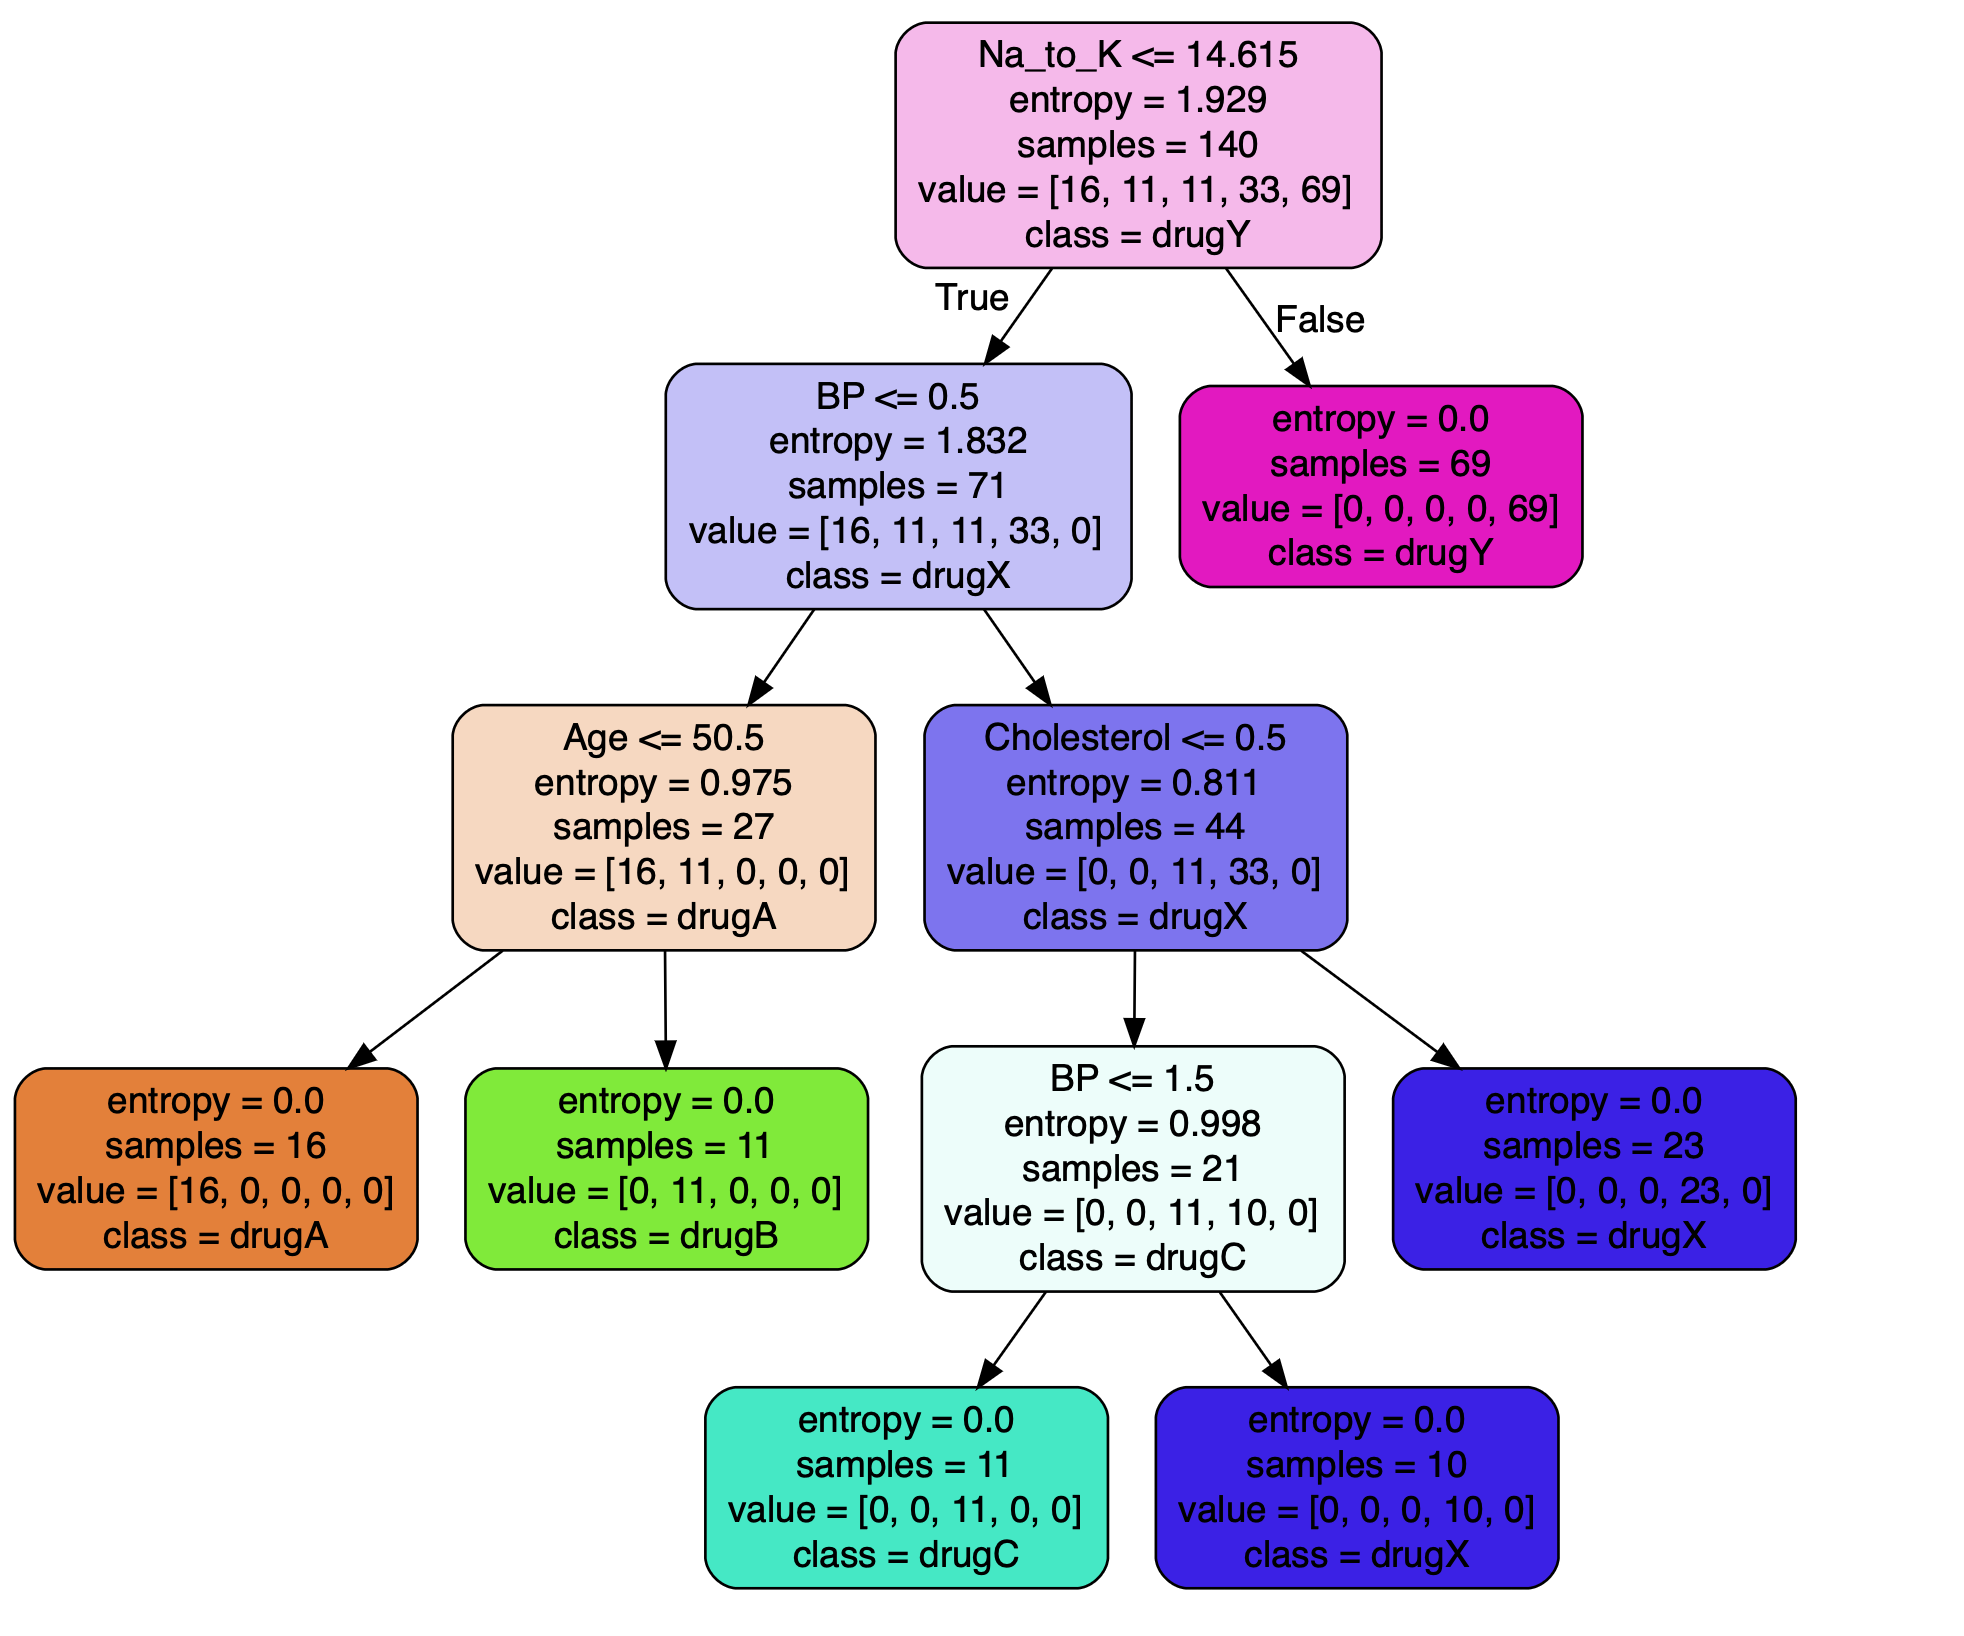

In [76]:
Image("SupervisedLearning/DrugSelection/DrugSelectionTree.png")